# __Clustering__

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#importing small cap stocks into 'small' dataframe
small = pd.DataFrame({
    'ASHOKA': pd.read_csv('./stocks/caps/small/ASHOKA.NS.csv')['Close'].values,
    'BAJAJELEC': pd.read_csv('./stocks/caps/small/BAJAJELEC.NS.csv')['Close'].values,
    'CENTURYPLY': pd.read_csv('./stocks/caps/small/CENTURYPLY.NS.csv')['Close'].values,
    'GUJALKALI': pd.read_csv('./stocks/caps/small/GUJALKALI.NS.csv')['Close'].values,
    'ITDC': pd.read_csv('./stocks/caps/small/ITDC.NS.csv')['Close'].values,
    'JETAIRWAYS': pd.read_csv('./stocks/caps/small/JETAIRWAYS.NS.csv')['Close'].values,
    'JKLAKSHMI': pd.read_csv('./stocks/caps/small/JKLAKSHMI.NS.csv')['Close'].values,
    'LAXMIMACH': pd.read_csv('./stocks/caps/small/LAXMIMACH.NS.csv')['Close'].values,
    'LUXIND': pd.read_csv('./stocks/caps/small/LUXIND.NS.csv')['Close'].values,
    'RAYMOND': pd.read_csv('./stocks/caps/small/RAYMOND.NS.csv')['Close'].values,
})
small.head()

,ASHOKA,BAJAJELEC,CENTURYPLY,GUJALKALI,ITDC,JETAIRWAYS,JKLAKSHMI,LAXMIMACH,LUXIND,RAYMOND
0,163.100006,533.763977,352.549988,868.200012,533.299988,843.500000,446.500000,6380.750000,1522.050049,1114.000000
1,162.800003,536.885986,354.600006,853.700012,556.849976,838.700012,449.399994,6385.450195,1531.800049,1113.900024
2,161.067001,543.862976,355.049988,841.799988,566.650024,827.250000,446.000000,6428.350098,1531.849976,1124.500000
3,159.867004,534.153992,358.350006,919.099976,549.450012,821.000000,438.450012,6396.000000,1523.599976,1128.900024
4,157.332993,536.155029,348.549988,891.099976,518.299988,790.349976,448.299988,6288.350098,1509.550049,1092.849976


In [3]:
#importing mid cap stocks into 'mid' dataframe
mid = pd.DataFrame({
    'ADANIPOWER' : pd.read_csv('./stocks/caps/mid/ADANIPOWER.NS.csv')['Close'].values,
    'AJANTPHARM' : pd.read_csv('./stocks/caps/mid/AJANTPHARM.NS.csv')['Close'].values,
    'AMARAJABAT' : pd.read_csv('./stocks/caps/mid/AMARAJABAT.NS.csv')['Close'].values,
    'APOLLOTYRE' : pd.read_csv('./stocks/caps/mid/APOLLOTYRE.NS.csv')['Close'].values,
    'BERGEPAINT' : pd.read_csv('./stocks/caps/mid/BERGEPAINT.NS.csv')['Close'].values,
    'CUMMINSIND' : pd.read_csv('./stocks/caps/mid/CUMMINSIND.NS.csv')['Close'].values,
    'EXIDEIND' : pd.read_csv('./stocks/caps/mid/EXIDEIND.NS.csv')['Close'].values,
    'GMRINFRA' : pd.read_csv('./stocks/caps/mid/GMRINFRA.NS.csv')['Close'].values,
    'GODREJIND' : pd.read_csv('./stocks/caps/mid/GODREJIND.NS.csv')['Close'].values,
    'IDBI' : pd.read_csv('./stocks/caps/mid/IDBI.NS.csv')['Close'].values,    
})
mid.head()

,ADANIPOWER,AJANTPHARM,AMARAJABAT,APOLLOTYRE,BERGEPAINT,CUMMINSIND,EXIDEIND,GMRINFRA,GODREJIND,IDBI
0,46.299999,1493.650024,854.450012,278.049988,262.100006,925.400024,223.399994,22.299999,617.150024,62.000000
1,46.099998,1511.699951,862.900024,279.049988,267.649994,936.700012,223.800003,21.750000,641.799988,61.950001
2,44.750000,1502.400024,857.549988,278.950012,266.950012,941.900024,224.199997,21.000000,632.349976,61.049999
3,44.200001,1501.699951,864.200012,278.700012,264.799988,935.950012,232.100006,22.100000,618.750000,62.900002
4,42.250000,1521.500000,856.849976,271.700012,260.950012,935.900024,228.300003,22.500000,616.049988,59.599998


In [4]:
#importing large cap stocks into 'large' dataframe
large = pd.DataFrame({
    'ADANIPORTS' : pd.read_csv('./stocks/caps/large/ADANIPORTS.NS.csv')['Close'].values,
    'ASIANPAINT' : pd.read_csv('./stocks/caps/large/ASIANPAINT.NS.csv')['Close'].values,
    'AXISBANK' : pd.read_csv('./stocks/caps/large/AXISBANK.NS.csv')['Close'].values,
    'BAJFINANCE' : pd.read_csv('./stocks/caps/large/BAJFINANCE.NS.csv')['Close'].values,
    'BPCL' : pd.read_csv('./stocks/caps/large/BPCL.NS.csv')['Close'].values,
    'CIPLA' : pd.read_csv('./stocks/caps/large/CIPLA.NS.csv')['Close'].values,
    'GAIL' : pd.read_csv('./stocks/caps/large/GAIL.NS.csv')['Close'].values,
    'HEROMOTOCO' : pd.read_csv('./stocks/caps/large/HEROMOTOCO.NS.csv')['Close'].values,
    'INFRATEL' : pd.read_csv('./stocks/caps/large/INFRATEL.NS.csv')['Close'].values,
    'LT' : pd.read_csv('./stocks/caps/large/LT.NS.csv')['Close'].values,    
})
large.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,GAIL,HEROMOTOCO,INFRATEL,LT
0,423.450012,1177.400024,562.799988,1802.199951,494.299988,619.750000,186.037994,3736.899902,370.799988,1323.750000
1,425.500000,1188.949951,558.750000,1780.349976,492.399994,612.349976,185.813004,3705.649902,367.750000,1323.550049
2,423.299988,1189.699951,555.099976,1770.099976,489.899994,612.099976,187.931000,3687.350098,374.799988,1329.150024
3,420.600006,1204.050049,560.549988,1738.150024,487.200012,610.250000,183.468994,3628.800049,370.500000,1325.949951
4,423.549988,1188.750000,563.200012,1687.349976,479.450012,601.400024,179.399994,3586.100098,367.950012,1326.199951


In [5]:
#creating a single dataframe of all the Close Prices from the stocks
df = pd.concat([large,mid,small], axis=1)
df.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,GAIL,HEROMOTOCO,INFRATEL,LT,...,ASHOKA,BAJAJELEC,CENTURYPLY,GUJALKALI,ITDC,JETAIRWAYS,JKLAKSHMI,LAXMIMACH,LUXIND,RAYMOND
0,423.450012,1177.400024,562.799988,1802.199951,494.299988,619.750000,186.037994,3736.899902,370.799988,1323.750000,...,163.100006,533.763977,352.549988,868.200012,533.299988,843.500000,446.500000,6380.750000,1522.050049,1114.000000
1,425.500000,1188.949951,558.750000,1780.349976,492.399994,612.349976,185.813004,3705.649902,367.750000,1323.550049,...,162.800003,536.885986,354.600006,853.700012,556.849976,838.700012,449.399994,6385.450195,1531.800049,1113.900024
2,423.299988,1189.699951,555.099976,1770.099976,489.899994,612.099976,187.931000,3687.350098,374.799988,1329.150024,...,161.067001,543.862976,355.049988,841.799988,566.650024,827.250000,446.000000,6428.350098,1531.849976,1124.500000
3,420.600006,1204.050049,560.549988,1738.150024,487.200012,610.250000,183.468994,3628.800049,370.500000,1325.949951,...,159.867004,534.153992,358.350006,919.099976,549.450012,821.000000,438.450012,6396.000000,1523.599976,1128.900024
4,423.549988,1188.750000,563.200012,1687.349976,479.450012,601.400024,179.399994,3586.100098,367.950012,1326.199951,...,157.332993,536.155029,348.549988,891.099976,518.299988,790.349976,448.299988,6288.350098,1509.550049,1092.849976


In [6]:
#creating a new dataframe with daily returns from every stock
ndf = df.pct_change()
ndf = ndf.dropna()
ndf.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,GAIL,HEROMOTOCO,INFRATEL,LT,...,ASHOKA,BAJAJELEC,CENTURYPLY,GUJALKALI,ITDC,JETAIRWAYS,JKLAKSHMI,LAXMIMACH,LUXIND,RAYMOND
1,0.004841,0.009810,-0.007196,-0.012124,-0.003844,-0.011940,-0.001209,-0.008363,-0.008225,-0.000151,...,-0.001839,0.005849,0.005815,-0.016701,0.044159,-0.005691,0.006495,0.000737,0.006406,-0.000090
2,-0.005170,0.000631,-0.006532,-0.005757,-0.005077,-0.000408,0.011399,-0.004938,0.019171,0.004231,...,-0.010645,0.012995,0.001269,-0.013939,0.017599,-0.013652,-0.007566,0.006718,0.000033,0.009516
3,-0.006378,0.012062,0.009818,-0.018050,-0.005511,-0.003022,-0.023743,-0.015879,-0.011473,-0.002408,...,-0.007450,-0.017852,0.009295,0.091827,-0.030354,-0.007555,-0.016928,-0.005032,-0.005386,0.003913
4,0.007014,-0.012707,0.004728,-0.029227,-0.015907,-0.014502,-0.022178,-0.011767,-0.006883,0.000189,...,-0.015851,0.003746,-0.027348,-0.030465,-0.056693,-0.037333,0.022465,-0.016831,-0.009222,-0.031934
5,0.023256,0.004206,0.039062,0.008208,0.000834,0.009561,0.004493,-0.005368,-0.005028,0.020472,...,-0.034958,-0.020748,0.010329,0.016104,-0.002315,0.039160,-0.001338,-0.008659,0.006724,0.014686


In [7]:
#calculating the annual mean return of every stock
ret = ndf.mean() * 252
ret

ADANIPORTS    0.012911
ASIANPAINT    0.237230
AXISBANK      0.184093
BAJFINANCE    0.485411
BPCL          0.059651
CIPLA        -0.111682
GAIL         -0.162773
HEROMOTOCO   -0.196746
INFRATEL     -0.133407
LT            0.025344
ADANIPOWER    0.330966
AJANTPHARM   -0.139873
AMARAJABAT   -0.036164
APOLLOTYRE   -0.215544
BERGEPAINT    0.381843
CUMMINSIND   -0.183353
EXIDEIND     -0.051937
GMRINFRA      0.126094
GODREJIND    -0.133425
IDBI         -0.155992
ASHOKA       -0.159028
BAJAJELEC    -0.146971
CENTURYPLY   -0.318143
GUJALKALI    -0.299990
ITDC         -0.131275
JETAIRWAYS   -1.087074
JKLAKSHMI    -0.131217
LAXMIMACH    -0.282231
LUXIND       -0.007594
RAYMOND      -0.194203
dtype: float64

In [8]:
#calculating the annual volatility of stocks
vol = ndf.std() * np.sqrt(252)
vol

ADANIPORTS    0.325326
ASIANPAINT    0.228608
AXISBANK      0.286898
BAJFINANCE    0.341044
BPCL          0.408425
CIPLA         0.249716
GAIL          0.308351
HEROMOTOCO    0.290284
INFRATEL      0.371853
LT            0.239492
ADANIPOWER    0.620307
AJANTPHARM    0.320075
AMARAJABAT    0.282723
APOLLOTYRE    0.325301
BERGEPAINT    0.282481
CUMMINSIND    0.307435
EXIDEIND      0.292179
GMRINFRA      0.415445
GODREJIND     0.263883
IDBI          0.511058
ASHOKA        0.416539
BAJAJELEC     0.382402
CENTURYPLY    0.398624
GUJALKALI     0.346744
ITDC          0.601612
JETAIRWAYS    1.026768
JKLAKSHMI     0.292268
LAXMIMACH     0.292414
LUXIND        0.336142
RAYMOND       0.400401
dtype: float64

In [9]:
#getting inertias
it = []
for x in range(1,31):
    km = KMeans(n_clusters = x, random_state = 0).fit(list(zip(vol.values,ret.values)))
    it.append(km.inertia_) 

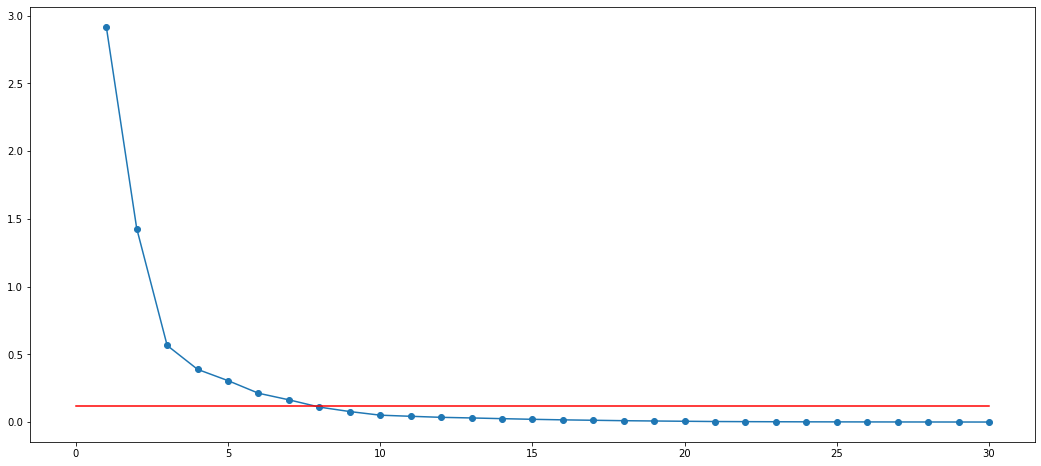

In [10]:
#plotting elbow curve using inertia points and comparing the change using a straight line
p = 0.12
plt.figure(figsize=(18,8))
plt.plot(range(1,31), it)
plt.scatter(range(1,31),it)
plt.plot([0,30],[p,p], c='r')

In [11]:
# K =7
km = KMeans(n_clusters = 7, random_state = 0).fit(list(zip(vol.values,ret.values)))
km.labels_

array([0, 4, 4, 4, 0, 6, 6, 6, 6, 0, 3, 6, 0, 6, 4, 6, 0, 0, 6, 5, 6, 6,
       1, 1, 5, 2, 6, 1, 0, 6])

In [12]:
#creating new dataframe with stock names, their annual returns, volatility and cluster labels of each
clusters = pd.DataFrame({
    'Stocks' : ndf.columns,
    'Returns' : ret.values,
    'Volatility' : vol.values,
    'Clusters': km.labels_
})
clusters

,Stocks,Returns,Volatility,Clusters
0,ADANIPORTS,0.012911,0.325326,0
1,ASIANPAINT,0.237230,0.228608,4
2,AXISBANK,0.184093,0.286898,4
3,BAJFINANCE,0.485411,0.341044,4
4,BPCL,0.059651,0.408425,0
5,CIPLA,-0.111682,0.249716,6
6,GAIL,-0.162773,0.308351,6
7,HEROMOTOCO,-0.196746,0.290284,6
8,INFRATEL,-0.133407,0.371853,6
9,LT,0.025344,0.239492,0


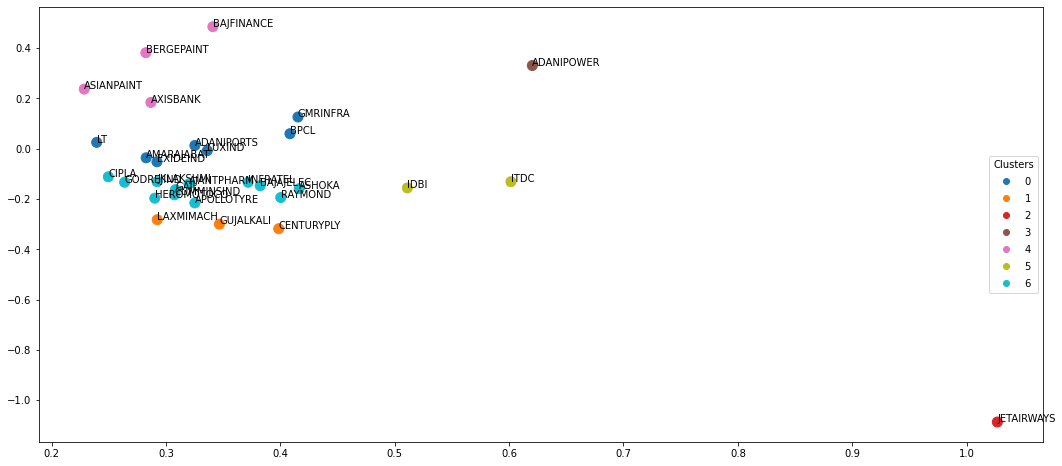

In [13]:
#plotting the stocks with their clusters mentioned as different colors
plt.figure(figsize=(18,8))
p = plt.scatter(clusters['Volatility'].values, clusters['Returns'].values, c = clusters['Clusters'].values, cmap = 'tab10', s=100)
for x in range(len(clusters.values)):
    plt.annotate(clusters['Stocks'].values[x], (clusters['Volatility'].values[x], clusters['Returns'].values[x]))
plt.legend(*p.legend_elements(), loc='center right', title="Clusters")